##### This notebook covers Investigations 2.1 and 2.2 from the Chapter 2 Section 1: Descriptive Statistics in ISCAM III

In [1]:
import pandas as pd

### Investigation 2.1:  Birth Weights

The CDC’s Vital Statistics Data allows you to download birth records for all births in the U.S. in a
particular year. In fact, we downloaded the records for all 3,956,112 births in 2016 and then extracted
several variables including the birth weight of the child (in grams). Can we use these data to build a
model of how birth weights can be expected to behave in the future? Can we use that model to make
predictions about certain kinds of birth weights? The file USbirthsJan2016.txt contains information on
all the births in January 2016, including birth weight, whether the baby was full term (gestation over 36
weeks), the 5 minute apgar score (an immediate measure of the infant’s health), and the amount of
weight gained by the mother during pregnancy (in lbs).

In [5]:
# Save data URL
url = "http://www.rossmanchance.com/iscam3/data/USbirthsJan2016.txt"

# Use pandas to read in the data from the URL
birthweights = pd.read_csv(url, sep = "\s+")
birthweights.head()

,date,birthweight,5_min_apgar,mom_weight_gain(lbs),full_term?,mom_age,mom_race,marital_status,dad_age,dad_race,mom_BMI,num,sex,weeks,no_inf
0,2016Jan,3705,9,25,1,35,1,1,5,1,31.5,1,F,40,True
1,2016Jan,3204,9,35,1,32,4,1,5,4,24.2,1,F,39,True
2,2016Jan,4499,9,35,1,18,3,2,2,3,23.8,1,M,39,True
3,2016Jan,3660,9,26,1,34,1,2,6,1,30.9,1,M,46,True
4,2016Jan,2866,9,43,1,31,4,1,5,4,23.8,1,F,39,True


In [6]:
# Check number of rows in dataset
len(birthweights)

317445

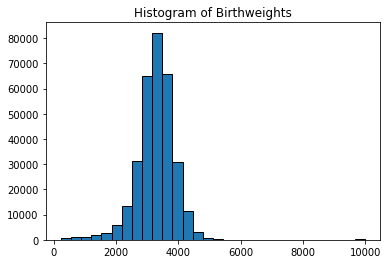

In [7]:
###### The next part of this lesson has the student create a dotplot of the 
###### birth weights. I wasn't able to find a convenient way to do this, so
###### I skipped this portion and created histograms.

# Create a histogram with matplotlib
import matplotlib.pyplot as plt

plt.hist(birthweights.birthweight, bins = 30, ec = 'black')
plt.title("Histogram of Birthweights")
plt.show()

The observations at 9999 don’t seem to belong. The “codebook” for these data states that
the largest birth weight is 8165 grams and for other variables it lists 99, 999, or 9999 as values for “not
stated” or unknown.


You could convert these observations to the missing value designator in your software (e.g., NaN in R)
or you can create a new data set that does not include those rows.

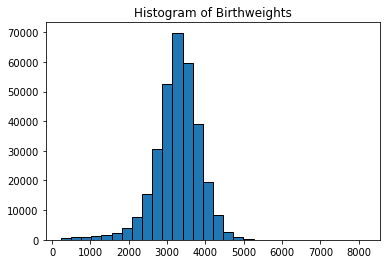

In [8]:
# First create variable that stores values of "True" for birthweights smaller
# than the largest one, 8165 grams (from text)
plausible_bw = birthweights['birthweight'] < 8166
# Then select the observations which fit that condition and save a new data frame
bw_clean1 = birthweights[plausible_bw]
# Create another histogram to confirm
plt.hist(bw_clean1.birthweight, bins = 30, ec = 'black')
plt.title("Histogram of Birthweights")
plt.show()

In [7]:
# To get an idea of shape, center, and spread of the birthweights nymerically,
# quickly summarize the variable with the pandas 'describe' function
bw_clean1.birthweight.describe()

count    317038.000000
mean       3259.126710
std         592.211969
min         227.000000
25%        2958.000000
50%        3297.500000
75%        3629.000000
max        8165.000000
Name: birthweight, dtype: float64

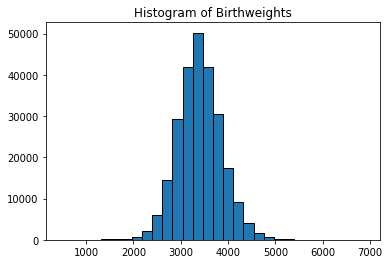

In [11]:
# Now subset the cleaned dataset by whether the pregnancy lasted at least 37
# weeks and less than 99 weeks
bw_clean2 =  bw_clean1[(bw_clean1['weeks'] > 37) & (bw_clean1['weeks'] < 99)]
plt.hist(bw_clean2.birthweight, bins = 30, ec = 'black')
plt.title("Histogram of Birthweights")
plt.show()

How would you characterize the shape, center, and variability of these birthweights?

In [12]:
# Once again, use descirbe to summarize the new, cleaner dataset
bw_clean2.birthweight.describe()

count    251045.000000
mean       3395.587225
std         459.850870
min         464.000000
25%        3090.000000
50%        3380.000000
75%        3685.000000
max        6897.000000
Name: birthweight, dtype: float64

In [13]:
bw_clean2.birthweight.std()

459.850870383084

Many software programs will allow you to overlay a theoretical normal distribution to see how well it
matches your data, using the mean and standard deviation from the observed data.

Overlay a normal model on the distribution of birthweight data and comment on how well the model
fits the data.

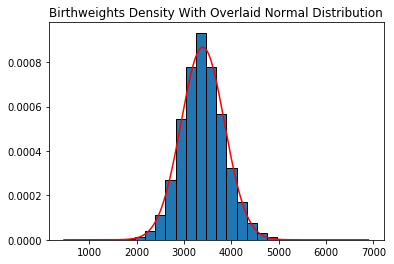

In [14]:
# Next we'd like to overlay a normal distribution on the histogram of the cleaned
# data to visually assess the fit of the data

# Use scipy.stats to generate a normal  distribution based on the data values
# for mean and standard deviation
from scipy.stats import norm
import numpy as np

norm_vals = norm.rvs(bw_clean2.birthweight)
mu, sd = norm.fit(norm_vals)

# Plot birthweight histogram
plt.hist(bw_clean2.birthweight, bins = 30, density = True, ec = 'black')

# Python will require that we do a little more to help build the plot of the 
# normal distribution than R does, so we'll start by telling it what range of
# values of X to plot over
xmin = bw_clean2.birthweight.min()
xmax = bw_clean2.birthweight.max()
xrange = np.linspace(xmin, xmax, 1000)

# With that, generate the normal distribution
pdf = norm.pdf(xrange, mu, sd)

# Then add the created distribution to the plot
plt.plot(xrange, pdf, 'r')

# Add a title and display the finished graph
plt.title("Birthweights Density With Overlaid Normal Distribution")
plt.show()

In [15]:
# Verify that approximately 95% of the birthweights fall within two standard deviations of
# the mean
xbar = bw_clean2.birthweight.mean()
s = bw_clean2.birthweight.std()
within2sd = bw_clean2[(bw_clean2['birthweight'] > (xbar - 2*s)) & (bw_clean2['birthweight'] < (xbar + 2*s))]
len(within2sd) / len(bw_clean2.birthweight)

0.9529566412396184

Another way to assess the “fit” of a probability model to the data is with a “probability plot” (aka
quantile plot). Probability plots work roughly like this: The computer determines how many
observations are in the data set, and then reports the z-scores it would expect for the 1/nth percentiles for
(also called quantiles) for the probability model. The plot compares these z-scores to the observed data;
if they “line up” then the graph supports that the data are behaving like a normal distribution. Whether
or not the observations follow a line can be easier to judge than whether a histogram follows a curve.

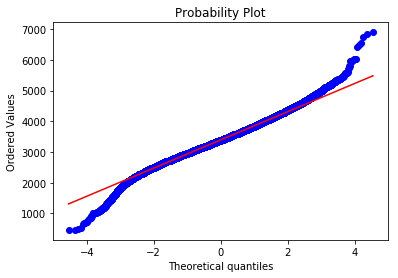

In [16]:
# Create a normal probability plot for the birthweights to assess normality

# Use probplot from scipy.stats  to do this with a variety of distributions;
# default is normal
from scipy.stats import probplot
import pylab

probplot(bw_clean2.birthweight, dist = 'norm', plot = pylab);

Do the observations deviate much from a line? If so how? [Hints: What does this suggest about how the
birth weight data values differ from what we would predict for a normal distribution (e.g., smallest
values are smaller than expected or larger than expected)? Is this consistent with what you saw in the
histogram?]


Some software packages report a p-value with the normal probability plot. The null
hypothesis here is actually that the data do follow a normal distribution, so if you fail to reject this null
hypothesis you can say that the data do not provide strong evidence that they do not arise from a
normally distributed population. (But keep in mind that large sample sizes will drive the p-value down,
regardless of the actual shape of the population.) There are several different types of significance tests
for normality, but in this text we will focus on the visual judgement of whether the probability plot
appears to follow a straight line.

Suppose we were willing to assume that in general birth weights are approximately normally distributed
with mean 3360 grams and standard deviation 475 grams. We can use this model to make predictions,
like how often a baby will be of low birth weight, defined as 2500 grams or less.

### Investigation 2.2: How Long Can You Stand It?

Diekmann, Krassnig, and Lorenz (1996) conducted a field study to explore whether driver
characteristics are related to an aggressive response (Thanks to Jeff Sklar for pointing us to this article).
The study was conducted at a busy intersection in Munich, West Germany, on two afternoons (Sunday
and Monday) in 1986. The experimenters sat in a Volkswaggen Jetta (the “blocking car”) and did not
accelerate after the traffic light turned green, and timed how long before the blocked car driver reacted
(either by honking or flashing headlights). The response time (in seconds) is our variable of interest.
Some values were “censored” in that the researcher stopped timing before the driver actually honked.
This can happen if there is a time limit to the observation period and “success” has not been observed
within that time period.



The data can be found in honking.txt. Use technology to create a histogram and describe the
behavior of the data – shape, center, spread, outliers (suggest an explanation?). Then overlay a normal
probability model. Do these data behave like a normal distribution? If not, how do they deviate from
normality? Also examine a normal probability plot and discuss how deviations from the line correspond
to the normal name shape you are observing. [Hint: Were the observed response times/quantiles placed
on the vertical or the horizontal axis?]

In [17]:
# Save data URL
url = "http://www.rossmanchance.com/iscam2/data/honking.txt"

# Use pandas to read in the data from the URL
honks = pd.read_csv(url, sep = "\s+")
honks.head()

,responsetime
0,2.88
1,4.63
2,2.36
3,2.68
4,2.50


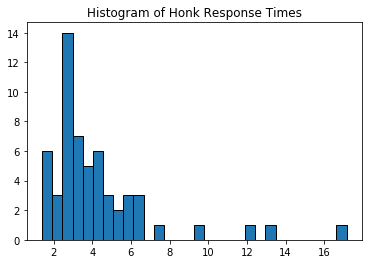

In [19]:
# Create a histogram of the response times
plt.hist(honks.responsetime, bins = 30, ec = 'black')
plt.title("Histogram of Honk Response Times")
plt.show()

In [20]:
# Compare mean and median response times
print("Mean response time is", round(honks.responsetime.mean(), 2), 
      "and median response time is", honks.responsetime.median())

Mean response time is 4.25 and median response time is 3.24


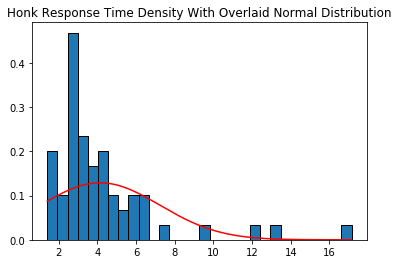

In [21]:
# Overlay normal distribution to observe fit

norm_vals = norm.rvs(honks.responsetime)
mu, sd = norm.fit(norm_vals)

# Plot birthweight histogram
plt.hist(honks.responsetime, bins = 30, density = True, ec = 'black')

# Python will require that we do a little more to help build the plot of the 
# normal distribution than R does, so we'll start by telling it what range of
# values of X to plot over
xmin = honks.responsetime.min()
xmax = honks.responsetime.max()
xrange = np.linspace(xmin, xmax, 1000)

# With that, generate the normal distribution
pdf = norm.pdf(xrange, mu, sd)

# Then add the created distribution to the plot
plt.plot(xrange, pdf, 'r')

# Add a title and display the finished graph
plt.title("Honk Response Time Density With Overlaid Normal Distribution")
plt.show()

When the data are skewed, the median and interquartile range are often considered better numerical
summaries of the center and variability of the distribution. When working with the median and
interquartile range, we often report the five number summary which consists of the minimum, lower
quartile, median, upper quartile, and maximum values.

Although boxplots are a nice visual of the five-number summary, they can sometimes miss interesting
features in a data set. In particular, shape can be more difficult to judge in a boxplot.

Another application of the inter-quartile range is as a way to measure whether an observation is far from
the bulk of the distribution.

In [22]:
# Calculate IQR
from scipy.stats import iqr
iqr(honks.responsetime)

2.09

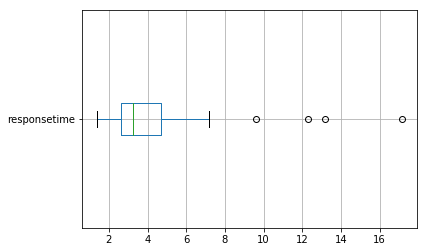

In [24]:
# Create a "modified" boxplot of the response times with pandas (shows outliers)
honks.boxplot(vert = False);

In [25]:
# Take the log of honk response time to fit normal distribution
lnhonks = np.log(honks.responsetime)
lnhonks.head()

0    1.057790
1    1.532557
2    0.858662
3    0.985817
4    0.916291
Name: responsetime, dtype: float64

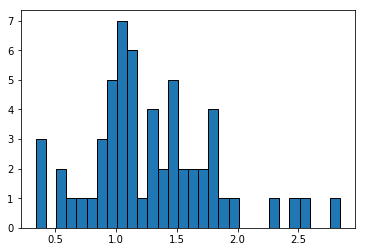

In [26]:
# Create histogram of lnhonks
plt.hist(lnhonks, bins = 30, ec = 'black');

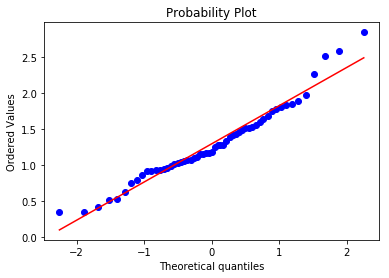

In [27]:
# Create normal probability plot of lnhonks
probplot(lnhonks, dist = 'norm', plot = pylab);

These data are not well modelled by a normal distribution. So can we still make predictions? There are
a couple of strategies. One would be to consider whether a rescaling or transformation of the data
might create a more normal-looking distribution, allowing us to use the methods from Investigation 2.1.
In this case, we need a transformation that will downsize the large values more than the small values.
Log transformations are often very helpful in this regard.

A **data transformation** applies a mathematical function to each value to re-express the data
on an alternative scale. Data transformations can also make the data more closely modeled with a
normal distribution, which could then satisfy the conditions the Central Limit Theorem and inference
procedures based on the t-distribution.

Create a new variable which is log(responsetime). (You can use either natural log or log base 10,
but so we all do the same thing, let’s use natural log here, which is the default in most software when
you say “log.”)

In [28]:
# Need to add this example

Another approach is to fit a different mathematical model to the original data. Use technology to overlay an exponential probability model (often used to model wait times) to these
data and/or create a probability plot using the exponential distribution as the reference distribution.

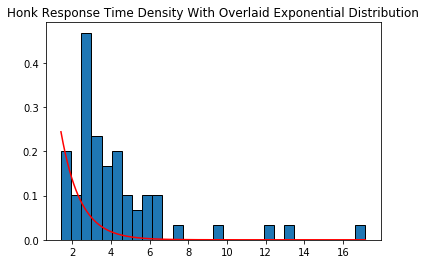

In [29]:
# Overlay exponential distribution on original histogram of honk response times
plt.hist(honks.responsetime, bins = 30, density = True, ec = 'black');

from scipy.stats import expon

xmin = honks.responsetime.min()
xmax = honks.responsetime.max()
xrange = np.linspace(xmin, xmax, 1000)

# Generate exponential PDF
pdf = expon.pdf(xrange)

# Then add the created distribution to the plot
plt.plot(xrange, pdf, 'r')

# Add a title and display the finished graph
plt.title("Honk Response Time Density With Overlaid Exponential Distribution")
plt.show()

Describe the behavior of the exponential distribution. Does it appear to be a reasonable fit for these
data? Describe any deviations.

Use technology to calculate the probability of a wait time under 2 seconds using the exponential
distribution with mean 4.25 sec

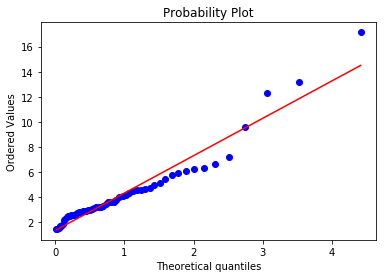

In [30]:
# Create exponential probability plot for the original honk response times
probplot(honks.responsetime, dist = 'expon', plot = pylab);

In [31]:
# Calculate probability that wait time is less than 2 seconds with exponential distribution
#exp_rands = np.random.exponential(scale = honks.responsetime.mean(), size = 2000);
#lessthan2sec = exp_rands < 2
#prob = len(lessthan2sec) / len(exp_rands)
#print('The probability that an individual waits less than 2 seconds is about', round(prob, 4))

There are of course, many other probability models we could look into. One limitation of
the exponential distribution is assuming the mean and standard deviation are equal, clearly not the case
for these data. There are other more flexible distributions (e.g., Gamma and Weibull) that use two
parameters to characterize the distribution rather than only one.